![Alt Text](https://www.owen.org/wp-content/uploads/inequaltyscreencap.png)

<h1 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About this Kernel </h1>

This dataset has been taken from the famous UCI Machine Learning Repository. The goal of this notebook is to accurately predict whether or not an adult makes more than 50000 US Dollars in an year on the basis of the feautures given.


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Introduction </h3>

Int his notebook, I will be using only one Machine Learning Algorithm to implement the predictions. This notebook is going  to be different from my previous works because I'll try to implement Logistic Regression from scratch rather than using scikit-learn.

> So, without any further delay, lets get into it!


In [ ]:
# ************** DATA MANIPULATION *****************

import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
full_data=pd.read_csv("/content/adult.csv")

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About the Dataset </h3>

* **Age**: Describes the age of individuals. Continuous.
* **Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: Continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: Number of years spent in education. Continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: Female, Male.
* **capital-gain**: Continuous.
* **capital-loss**: Continuous.
* **hours-per-week**: Continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **salary**: >50K,<=50K!

In [ ]:
full_data.shape

(48842, 15)

In [ ]:
full_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* The dataset contains absolutely **no null values**!
* Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
* There are no Float Datatypes in the dataset.
* Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.
* Although the dataset does not contain any null values, a closer look (see cell 3) tells us that there are a lot of **'?'** values in our dataset. We will have to **replace** those values!

In [ ]:
full_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
* The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
* While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
* The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [ ]:
full_data[full_data=='?']=np.nan

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* We can see that the columns **workclass**, **occupation**, and **native.country** contains null values. We would have to find out a way to deal with them!
* There can be many ways to impute missing values, but right now, for the sake of simplicity we would impute them using **mode**!

In [ ]:
# Assuming full_data is a pandas DataFrame
unique_ages_sorted = sorted(full_data['age'].unique())
unique_ages_sorted.sort()
print(unique_ages_sorted)

[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [ ]:
def age_group(x):
  x=int(x)
  x=abs(x)
  if ( 18 < x < 31):
    return '19-30'
  if( 30 < x < 41 ):
    return "31-40"
  if( 40 < x < 51 ):
    return "41-50"
  if( 50 < x < 61 ):
    return "51-60"
  if( 60 < x < 71 ):
    return "61-70"
  else:
    return 'Greater than 70'

full_data['age_group'] = full_data['age'].apply(age_group)


In [ ]:
for col in ['workclass', 'occupation', 'native-country']:
  full_data[col].fillna(full_data[col].mode(), inplace = True)


In [ ]:
full_data.rename(columns={'educational-num':'educational_num', 'marital-status': 'marital_status', 'capital-gain': 'capital_gain', 'capital-loss': 'capital_loss', 'hours-per-week': 'hours_per_week', 'native-country':'native_country'}, inplace  =True)

In [ ]:
full_data.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,age_group
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,19-30
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,31-40
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,19-30
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,41-50
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,Greater than 70


##**MACHINE LEARNING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital_status', 'occupation', 'relationship',
               'race', 'gender','native_country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(full_data[col])
    full_data[col] = label_encoder.transform(full_data[col])

In [ ]:
from sklearn.model_selection import train_test_split
x = full_data.drop(columns=['income'], axis = 1)
y = full_data['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About Logistic Regression: </h3>


Before we start coding let us first understand or atleast try to understand the things happening at the back-end of **Scikit Learn's Logistic Regression**. The aim of this section is to explain the math behind Logistic Regression and to accomplish the first objective of this kernel.

To be able to do this we must answer the question, how does a Logistic Regression work? In theory, a Logistic regression takes input and returns an output of probability, a value between 0 and 1. How does a Logistic Regression do that? With the help of a function called a logistic function or most commonly known as a **sigmoid**. This sigmoid function is reponsible for predicting or classifying a given input.

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About the Sigmoid function: </h3>

* It is a mathematical function having a characteristic that can take any real value and map it to between 0 to 1 shaped like the letter “S”.
* The sigmoid function also called a **logistic function**.
* The sigmoid function g(z) takes features and weights z as an input and returns a result between 0 and 1.
* The output of the sigmoid function is an actual prediction ŷ.
* So, if the value of z goes to **positive infinity** then the predicted value of y will become 1 and if it goes to **negative infinity** then the predicted value of y will become 0.
* And if the outcome of the sigmoid function is more than 0.5 then we classify that label as **class 1** or positive class and if it is less than 0.5 then we can classify it to negative class or label as **class 0**.

![Alt Text](https://miro.medium.com/max/932/1*bCCcQhMjHGaI89i-7i3xFw.png)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
Y_pred = log_reg.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, Y_pred)
print('--'*30)
print("Logistic Regression",acc*100,'%')

------------------------------------------------------------
Logistic Regression 82.2425441889033 %


Precision: 0.70
Recall: 0.45
------------------------------------------------------------
[[10479   659]
 [ 1943  1572]]


<Axes: >

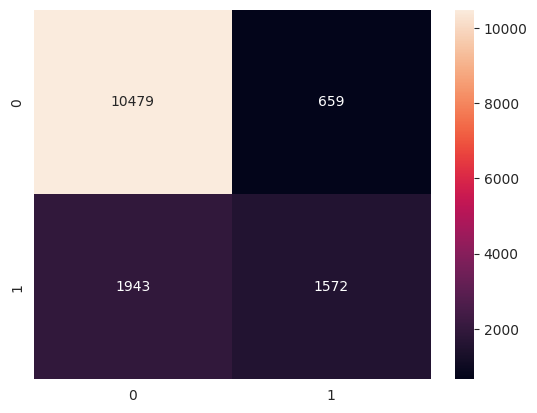

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")

##**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)


Decision Tree Classifier


DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 81.44 %


Precision: 0.61
Recall: 0.63
------------------------------------------------------------


<Axes: >

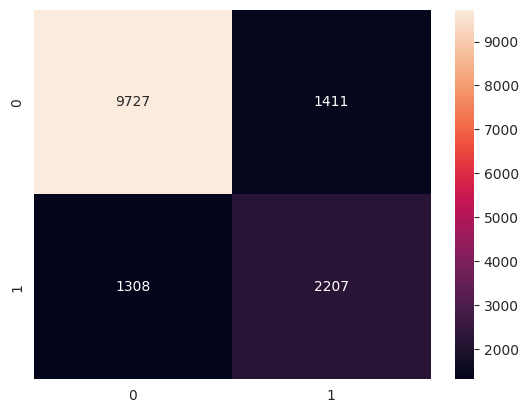

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
Dtree_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion, annot=True, fmt="d")

# **3. Random Forest**

## **Model Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)


Random Forest Classifier


RandomForestClassifier()

## **Model Evaluation**
**Random Forest**

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 85.54 %
